# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'1.0.2'

In [2]:
# Load in settings, paths, file extensions etc. that you saved in step 1
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [3]:
import os
df2=pf.merge_fit_files(path=os.getcwd())
df2.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Diad1_Asym70,Diad1_Yuan2017_sym_factor,Diad1_Remigi2021_BSF,Diad2_Asym50,Diad2_Asym70,Diad2_Yuan2017_sym_factor,Diad2_Remigi2021_BSF,Diad1_PDF_Model,Diad2_PDF_Model,Standard
0,187-1-111-reg4-A--Spectrum--012--Spec.Data 1,103.955746,0.042004,1284.095123,0.041192,138.038359,1284.095123,484.387455,1.348290,3.142159,...,1.014286,0.033374,0.019535,1.059172,1.118841,0.103145,0.005458,PseudoVoigtModel,PseudoVoigtModel,No
1,187-1-111-reg4-A--Spectrum--013--Spec.Data 1,103.972925,0.020003,1284.031975,0.018446,132.758713,1284.031975,454.305228,1.334535,2.617592,...,1.189796,0.379270,0.020105,1.068762,1.106169,0.121248,0.005787,PseudoVoigtModel,PseudoVoigtModel,No
2,187-1-111-reg4-A--Spectrum--014--Spec.Data 1,104.024513,0.027742,1284.023547,0.025881,95.275678,1284.023547,324.050694,1.329050,2.175436,...,1.068865,0.003310,0.027899,1.003810,1.085795,0.006678,0.008053,PseudoVoigtModel,PseudoVoigtModel,No
3,187-1-111-reg5-B--Spectrum--036--Spec.Data 1,103.889906,0.017093,1284.304318,0.015913,126.249140,1284.304318,365.321283,1.118718,1.822937,...,1.329897,0.825578,0.017722,1.010549,1.027778,0.016624,0.005645,PseudoVoigtModel,PseudoVoigtModel,No
4,187-1-111-reg6-A--Spectrum--047--Spec.Data 1,104.180189,0.034496,1283.740785,0.033193,58.743759,1283.740785,168.559562,1.164294,1.623713,...,1.048649,0.150989,0.039640,1.253731,1.161501,0.387085,0.010861,PseudoVoigtModel,PseudoVoigtModel,No


## First, get the metadata for this day

In [4]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=meta_file_ext, exclude_str=['Ne', 'NE', 'Si', 'nodiad', 'Ne', 'Cap','window','Video', 'nodiad','diad','Series','no_diad','diad','Series','unquant'],
 sort=True)
diad_meta[0]

'013 187-1-111-reg4-A--Spectrum--012--Information.txt'

## Now get all the important information out of the metadata files

In [5]:
# This will only work for WITEC - for other vendors, you might have to use the file datastamp. See the HORIBA example
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=diad_meta, prefix=prefix, str_prefix=str_prefix,
trupower=TruPower)
meta.head()

100%|██████████| 42/42 [00:08<00:00,  4.70it/s]

Done


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,187-1-111-reg4-A--Spectrum--012--Information.txt,"January 17, 2024\n",January,17.0,6.059,60.0,5.0,100.0,"['0h', '5m', '2s']",11:51:35 AM\n,42695.0,1325.004
1,187-1-111-reg4-A--Spectrum--013--Information.txt,"January 17, 2024\n",January,17.0,6.010,60.0,5.0,100.0,"['0h', '5m', '1s']",11:58:15 AM\n,43095.0,1325.004
2,187-1-111-reg4-A--Spectrum--014--Information.txt,"January 17, 2024\n",January,17.0,5.985,60.0,5.0,100.0,"['0h', '5m', '1s']",12:04:10 PM\n,43450.0,1325.004
3,187-1-111-reg4-B--Spectrum--016--Information.txt,"January 17, 2024\n",January,17.0,5.978,60.0,5.0,100.0,"['0h', '5m', '1s']",12:11:50 PM\n,43910.0,1325.004
4,187-1-111-reg4-B--Spectrum--017--Information.txt,"January 17, 2024\n",January,17.0,5.989,60.0,5.0,100.0,"['0h', '5m', '1s']",12:17:01 PM\n,44221.0,1325.004


## Then get a simple file name you can stitch with the spectra

In [6]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=meta_file_ext)
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'187-1-111-reg4-A--Spectrum--012--Information'

In [7]:
for i in range(len(file_m)):
    file_m[i] = file_m[i].replace("--Information", "")
file_m

array(['187-1-111-reg4-A--Spectrum--012',
       '187-1-111-reg4-A--Spectrum--013',
       '187-1-111-reg4-A--Spectrum--014',
       '187-1-111-reg4-B--Spectrum--016',
       '187-1-111-reg4-B--Spectrum--017',
       '187-1-111-reg4-B--Spectrum--018',
       '187-1-111-reg4-C--Spectrum--021',
       '187-1-111-reg4-C--Spectrum--022',
       '187-1-111-reg4-C--Spectrum--023',
       '187-1-111-reg5-A--Spectrum--032',
       '187-1-111-reg5-A--Spectrum--033',
       '187-1-111-reg5-A--Spectrum--034',
       '187-1-111-reg5-B--Spectrum--036',
       '187-1-111-reg5-C--Spectrum--038',
       '187-1-111-reg5-D--Spectrum--041',
       '187-1-111-reg6-A--Spectrum--047',
       '187-1-111-reg6-B--Spectrum--048',
       '187-1-111-reg7-A--Spectrum--055',
       '187-1-111-reg7-B--Spectrum--057',
       '187-1-111-reg8-A--Spectrum--061',
       '187-1-111-reg8-B--Spectrum--063',
       '187-1-111-reg8-C--Spectrum--065',
       '187-1-112-reg1-A--Spectrum--079',
       '187-1-112-reg2-A--Spectrum

## Now get filename from spectra into same form as metadata

In [8]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=spectra_file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

good job, no duplicate file names
187-1-111-reg4-A--Spectrum--012--Spec.Data 1


In [9]:
for i in range(len(file_s)):
    file_s[i] = file_s[i].replace("--Spec.Data 1", "")
file_s

array(['187-1-111-reg4-A--Spectrum--012',
       '187-1-111-reg4-A--Spectrum--013',
       '187-1-111-reg4-A--Spectrum--014',
       '187-1-111-reg5-B--Spectrum--036',
       '187-1-111-reg6-A--Spectrum--047',
       '187-1-112-reg1-A--Spectrum--079',
       '187-1-111-reg4-B--Spectrum--016',
       '187-1-111-reg4-B--Spectrum--017',
       '187-1-111-reg4-B--Spectrum--018',
       '187-1-111-reg4-C--Spectrum--021',
       '187-1-111-reg4-C--Spectrum--022',
       '187-1-111-reg4-C--Spectrum--023',
       '187-1-111-reg5-A--Spectrum--032',
       '187-1-111-reg5-A--Spectrum--033',
       '187-1-111-reg5-A--Spectrum--034',
       '187-1-111-reg5-C--Spectrum--038',
       '187-1-111-reg5-D--Spectrum--041',
       '187-1-111-reg6-B--Spectrum--048',
       '187-1-111-reg7-A--Spectrum--055',
       '187-1-111-reg7-B--Spectrum--057',
       '187-1-111-reg8-A--Spectrum--061',
       '187-1-111-reg8-B--Spectrum--063',
       '187-1-111-reg8-C--Spectrum--065',
       '187-1-112-reg2-A--Spectrum

In [10]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,187-1-111-reg4-A--Spectrum--012,103.955746,0.042004,1284.095123,0.041192,138.038359,1284.095123,484.387455,1.348290,3.142159,...,January,17.0,6.059,60.0,5.0,100.0,"['0h', '5m', '2s']",11:51:35 AM\n,42695.0,1325.004
1,187-1-111-reg4-A--Spectrum--013,103.972925,0.020003,1284.031975,0.018446,132.758713,1284.031975,454.305228,1.334535,2.617592,...,January,17.0,6.010,60.0,5.0,100.0,"['0h', '5m', '1s']",11:58:15 AM\n,43095.0,1325.004
2,187-1-111-reg4-A--Spectrum--014,104.024513,0.027742,1284.023547,0.025881,95.275678,1284.023547,324.050694,1.329050,2.175436,...,January,17.0,5.985,60.0,5.0,100.0,"['0h', '5m', '1s']",12:04:10 PM\n,43450.0,1325.004
3,187-1-111-reg5-B--Spectrum--036,103.889906,0.017093,1284.304318,0.015913,126.249140,1284.304318,365.321283,1.118718,1.822937,...,January,17.0,6.076,60.0,5.0,100.0,"['0h', '5m', '1s']",1:31:00 PM\n,48660.0,1325.004
4,187-1-111-reg6-A--Spectrum--047,104.180189,0.034496,1283.740785,0.033193,58.743759,1283.740785,168.559562,1.164294,1.623713,...,January,17.0,6.042,60.0,5.0,100.0,"['0h', '5m', '1s']",1:53:07 PM\n,49987.0,1325.004


## If you have secondary phases, now is the time to merge those in

In [11]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=str_prefix, file_ext=spectra_file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)

Made a df!
good job, no duplicate file names


## If you have SO2, now is the time to calculate the molar proportion of SO2

In [12]:
if 'Peak_Area_SO2' in df_combo_sec_phase:
    

        SO2_mol_ratio=pf.calculate_SO2_CO2_ratio(SO2_area=df_combo_sec_phase['Peak_Area_SO2'], 
        diad1_area=df_combo_sec_phase['Diad1_Voigt_Area'], diad2_area=df_combo_sec_phase['Diad2_Voigt_Area'], 
                SO2_cross_sec=5.3, diad1_cross_sec=0.89, diad2_cross_sec=1.4)
        

        df_combo_sec_phase['SO2_mol_ratio']=SO2_mol_ratio

## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [13]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

5.4105476051721915e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,187-1-111-reg4-A--Spectrum--012,0.407379,0.018764,0.018616,0.002349,103.730890,0.041917,0.000577,0.042004,6.059,...,42695.0,NaN,NaN,NaN,NaN,NaN,42695.0,0.997837,0.997831,0.997843
1,187-1-111-reg4-A--Spectrum--013,0.414808,0.009202,0.008897,0.002349,103.747590,0.019968,0.000576,0.020003,6.010,...,43095.0,NaN,NaN,NaN,NaN,NaN,43095.0,0.997833,0.997827,0.997838
2,187-1-111-reg4-A--Spectrum--014,0.437688,0.012687,0.012467,0.002350,103.798671,0.027688,0.000575,0.027742,5.985,...,43450.0,NaN,NaN,NaN,NaN,NaN,43450.0,0.997829,0.997823,0.997834
3,187-1-111-reg4-B--Spectrum--016,0.526753,0.005283,0.004728,0.002359,103.992396,0.010066,0.000574,0.010071,5.978,...,43910.0,NaN,NaN,NaN,NaN,NaN,43910.0,0.997824,0.997818,0.997829
4,187-1-111-reg4-B--Spectrum--017,0.522317,0.005289,0.004734,0.002358,103.982942,0.010101,0.000573,0.010107,5.989,...,44221.0,NaN,NaN,NaN,NaN,NaN,44221.0,0.997821,0.997815,0.997826


In [14]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

5.4105476051721915e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,187-1-111-reg4-A--Spectrum--012,0.407379,0.018764,0.018616,0.002349,103.730890,0.041917,0.000577,0.042004,6.059,...,42695.0,NaN,NaN,NaN,NaN,NaN,42695.0,0.997837,0.997831,0.997843
1,187-1-111-reg4-A--Spectrum--013,0.414808,0.009202,0.008897,0.002349,103.747590,0.019968,0.000576,0.020003,6.010,...,43095.0,NaN,NaN,NaN,NaN,NaN,43095.0,0.997833,0.997827,0.997838
2,187-1-111-reg4-A--Spectrum--014,0.437688,0.012687,0.012467,0.002350,103.798671,0.027688,0.000575,0.027742,5.985,...,43450.0,NaN,NaN,NaN,NaN,NaN,43450.0,0.997829,0.997823,0.997834
3,187-1-111-reg4-B--Spectrum--016,0.526753,0.005283,0.004728,0.002359,103.992396,0.010066,0.000574,0.010071,5.978,...,43910.0,NaN,NaN,NaN,NaN,NaN,43910.0,0.997824,0.997818,0.997829
4,187-1-111-reg4-B--Spectrum--017,0.522317,0.005289,0.004734,0.002358,103.982942,0.010101,0.000573,0.010107,5.989,...,44221.0,NaN,NaN,NaN,NaN,NaN,44221.0,0.997821,0.997815,0.997826


### This cell saves the merged together dataframe with the folder name and the date you fitted it

In [15]:

from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight')
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)
sorted_df.to_excel(name)

Raman_session_January 17, 2024_fitted_2024-07-12.xlsx


## This helps visualize the errors on each spectra 

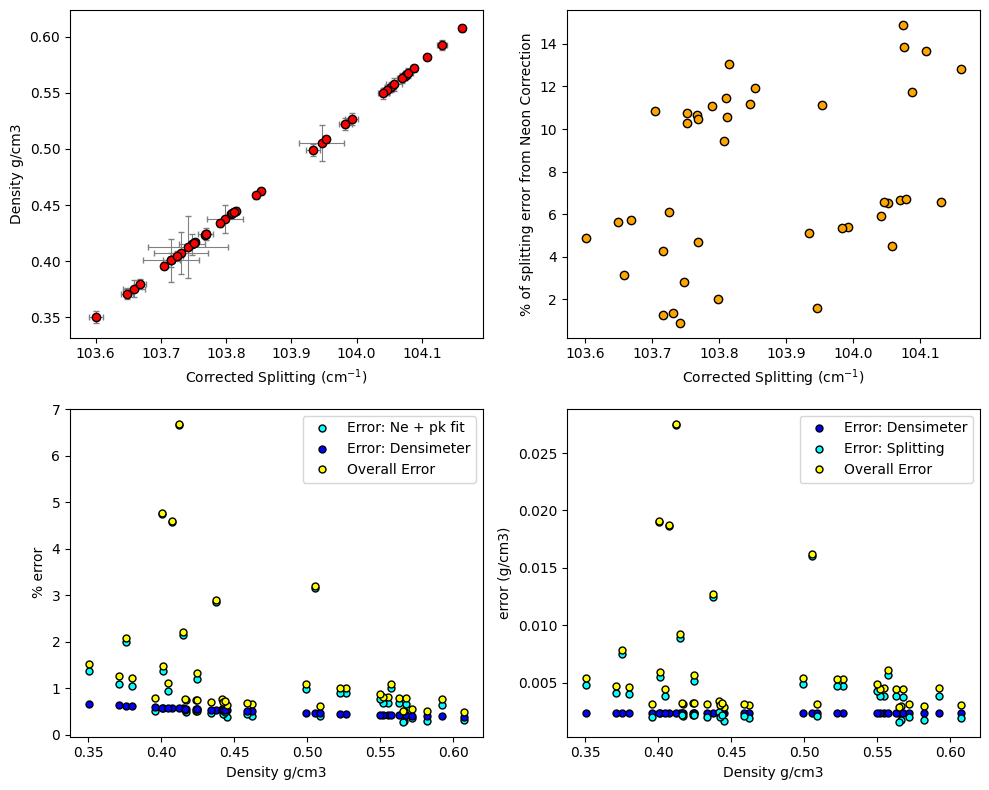

In [16]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Splitting')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

## lets look at standards


Text(0, 0.5, 'Density g/cm3')

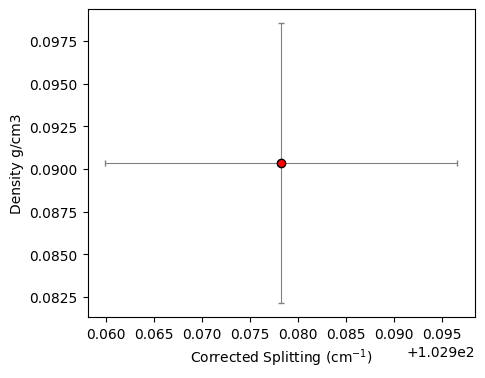

In [17]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5,4))
df=sorted_df.loc[ sorted_df['Standard']=='Yes']
ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

In [18]:
df.to_clipboard(excel=True,index=False)

## If you were analysing fluid inclusions, lets calculate their pressures
- This bit isn't valid for melt inclusion vapour bubbles. 

Text(0, 0.5, '# of FI')

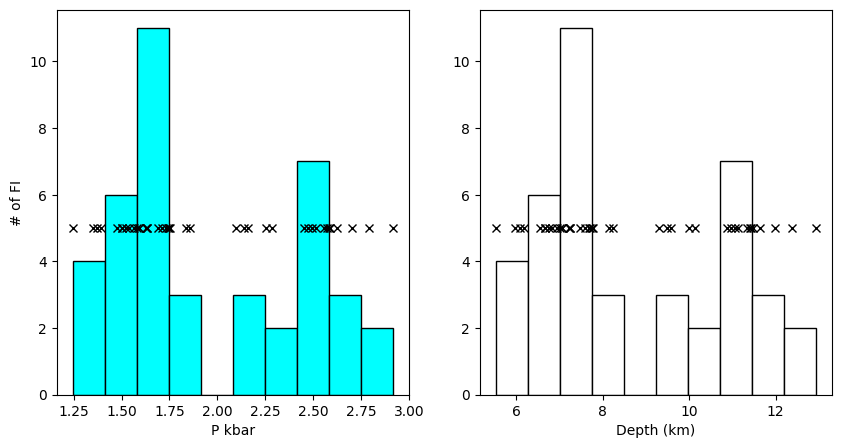

In [19]:
# Calculate pressure with a temperature estimate
Temp_C=1150
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2300)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan', bins=10)
ax1.plot(Pressure_SW96['P_kbar'], Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.plot(Depth, Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.hist(Depth, ec='k', fc='white', bins=10)
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('# of FI')

In [20]:
import os

if os.name=="posix":

    def mac_notification(title, subtitle, message):
        """
        Display a macOS notification with the default sound using AppleScript.
        
        Args:
        - title: Title of the notification.
        - subtitle: Subtitle of the notification.
        - message: Main message content of the notification.
        """
        os.system("""
                osascript -e 'display notification "{}" with title "{}" subtitle "{}" sound name "default"'
                """.format(message, title, subtitle))

    mac_notification("Notebook Completed", "VSCode", "Step4 Stitch outputs")

else:

    # %pip install winotify

    from winotify import Notification, audio

    toast= Notification(app_id="VSCode",title="Notebook completed",
                        msg="Step4 Stitch outputs is done!",
                        duration="short")
    toast.set_audio(audio.Mail,loop=False)
    toast.show()